In [1]:
import os
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import matplotlib.cm as cm
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import itertools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.manifold import TSNE
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
import graphviz

In [2]:
df_original = pd.read_excel("WonderfulWinesoftheWorld.xlsx")

In [3]:
df = df_original.copy()

In [4]:
df.shape

(10001, 30)

In [5]:
df.head()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
0,5325.0,653.0,55.0,20.0,78473.0,0.0,0.0,20.0,18.0,826.0,...,0,0,0,0,0,0,0,0,0,0.240092
1,3956.0,1041.0,75.0,18.0,105087.0,0.0,0.0,36.0,33.0,1852.0,...,0,0,0,1,0,0,0,0,0,0.435944
2,3681.0,666.0,18.0,12.0,27984.0,1.0,0.0,4.0,56.0,39.0,...,0,0,0,0,0,0,0,0,0,0.350584
3,2829.0,1049.0,42.0,16.0,61748.0,1.0,1.0,2.0,46.0,37.0,...,0,0,0,0,0,0,0,1,1,0.594082
4,8788.0,837.0,47.0,16.0,65789.0,0.0,1.0,2.0,3.0,36.0,...,0,0,0,0,0,0,0,0,0,0.782248


In [6]:
#prof = ProfileReport(df)

In [7]:
#prof

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum().sum()

2

In [10]:
df.head().sort_index()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
0,5325.0,653.0,55.0,20.0,78473.0,0.0,0.0,20.0,18.0,826.0,...,0,0,0,0,0,0,0,0,0,0.240092
1,3956.0,1041.0,75.0,18.0,105087.0,0.0,0.0,36.0,33.0,1852.0,...,0,0,0,1,0,0,0,0,0,0.435944
2,3681.0,666.0,18.0,12.0,27984.0,1.0,0.0,4.0,56.0,39.0,...,0,0,0,0,0,0,0,0,0,0.350584
3,2829.0,1049.0,42.0,16.0,61748.0,1.0,1.0,2.0,46.0,37.0,...,0,0,0,0,0,0,0,1,1,0.594082
4,8788.0,837.0,47.0,16.0,65789.0,0.0,1.0,2.0,3.0,36.0,...,0,0,0,0,0,0,0,0,0,0.782248


In [11]:
df.columns

Index(['Custid', 'Dayswus', 'Age', 'Edu', 'Income', 'Kidhome', 'Teenhome',
       'Freq', 'Recency', 'Monetary', 'LTV', 'Perdeal', 'Dryred', 'Sweetred',
       'Drywh', 'Sweetwh', 'Dessert', 'Exotic', 'WebPurchase', 'WebVisit',
       'SMRack', 'LGRack', 'Humid', 'Spcork', 'Bucket', 'Access', 'Complain',
       'Mailfriend', 'Emailfriend', 'Rand'],
      dtype='object')

## Initial Data Visualization

NumExpr defaulting to 8 threads.
Executing constrainedlayout
LayoutBox: gridspec000000.ss000001.ax000002, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 3.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) ital

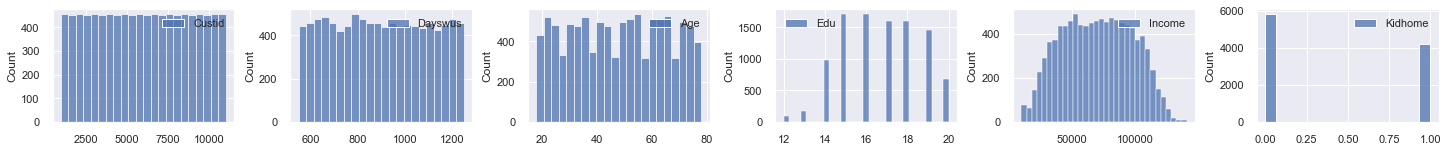

Executing constrainedlayout
LayoutBox: gridspec000013.ss000014.ax000015, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002390
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000013.ss000016.ax000017, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000013.ss000018.ax000019, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000013.ss000020.ax000021, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003840
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000013.ss000022.ax000023, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000013.ss000024.ax000025, (left: 0.000) (bot: 0.000) (righ

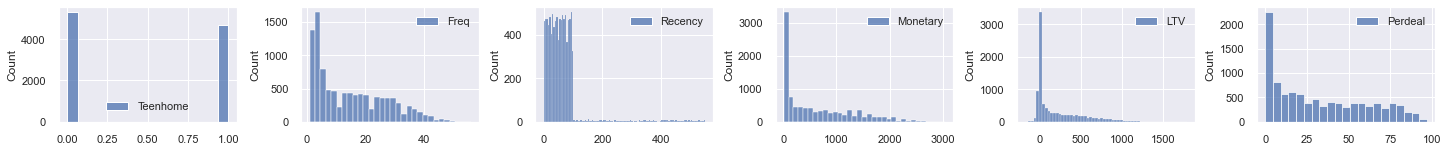

Executing constrainedlayout
LayoutBox: gridspec000026.ss000027.ax000028, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.004458
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000026.ss000029.ax000030, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000026.ss000031.ax000032, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002683
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000026.ss000033.ax000034, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000026.ss000035.ax000036, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000026.ss000037.ax000038, (left: 0.000) (bot: 0.000) (righ

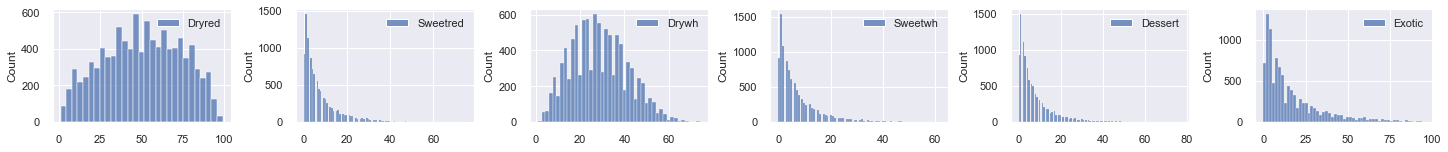

Executing constrainedlayout
LayoutBox: gridspec000039.ss000040.ax000041, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000039.ss000042.ax000043, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000039.ss000044.ax000045, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000039.ss000046.ax000047, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000039.ss000048.ax000049, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000039.ss000050.ax000051, (left: 0.000) (bot: 0.000) (righ

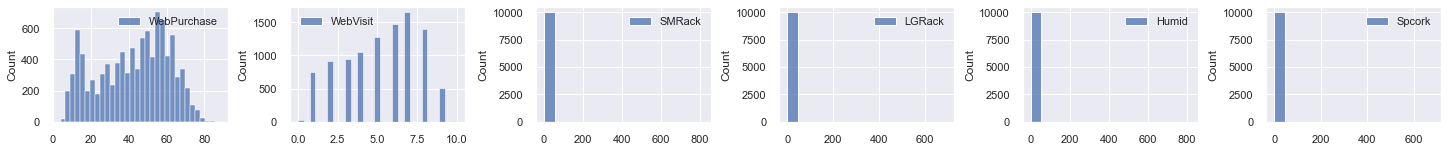

Executing constrainedlayout
LayoutBox: gridspec000052.ss000053.ax000054, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000052.ss000055.ax000056, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000052.ss000057.ax000058, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000052.ss000059.ax000060, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.003681
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000052.ss000061.ax000062, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000052.ss000063.ax000064, (left: 0.000) (bot: 0.000) (righ

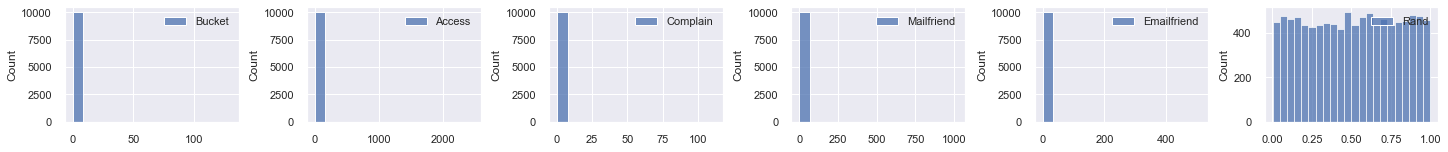

In [12]:
sns.set()

plot_features = df.columns
#fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30,3), constrained_layout=True)
j=0
k=1
for i in range(5):
    fig, axes = plt.subplots(1,6, figsize=(20,2), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.histplot(data=df.iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

Executing constrainedlayout
LayoutBox: gridspec000065.ss000066.ax000067, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.032379
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000065.ss000068.ax000069, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.028125
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000065.ss000070.ax000071, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000065.ss000072.ax000073, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000065.ss000074.ax000075, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.036632
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000065.ss000076.ax000077, (left: 0.000) (bot: 0.000) (right: 0.

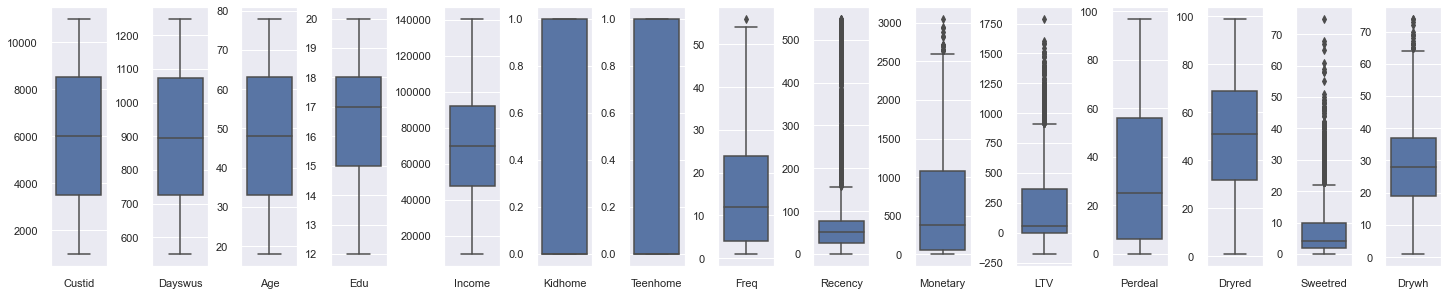

Executing constrainedlayout
LayoutBox: gridspec000096.ss000097.ax000098, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000096.ss000099.ax000100, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000096.ss000101.ax000102, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000096.ss000103.ax000104, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.004272
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000096.ss000105.ax000106, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000096.ss000107.ax000108, (left: 0.000) (bot: 0.000) (right: 0.

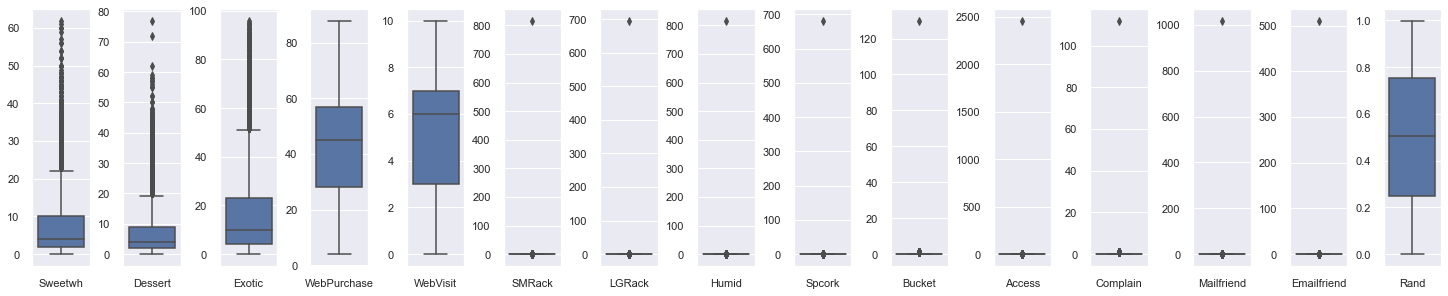

In [13]:
sns.set()

plot_features = df.columns
#fig, axes = plt.subplots(1, len(plot_features), figsize=(45,8), constrained_layout=True)
j=0
k=1


for i in range(2):
    fig, axes = plt.subplots(1,int(len(plot_features)/2), figsize=(20,4), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.boxplot(data=df.iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001CEB65C7F40>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001CEB65C7F40> on colorbar
Setting pcolormesh
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


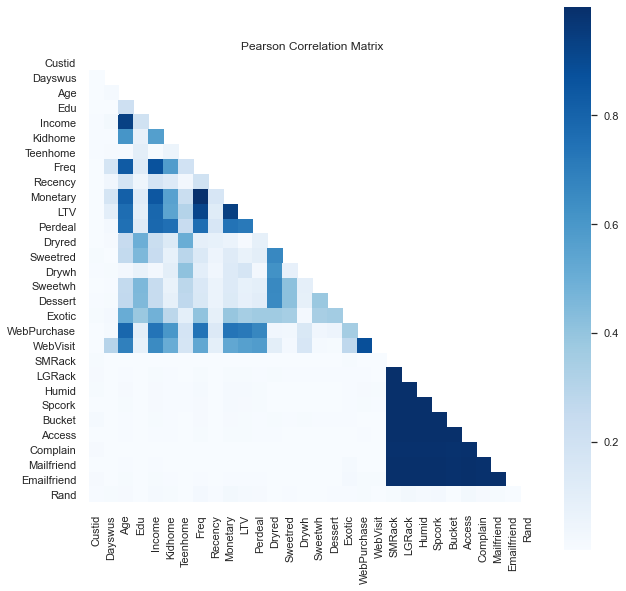

In [14]:
def heatmap_pearson(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Pearson Correlation Matrix')
    plt.show()
    
heatmap_pearson(df.corr(method='pearson').abs())

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001CEB8874AF0>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001CEB8874AF0> on colorbar
Setting pcolormesh
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


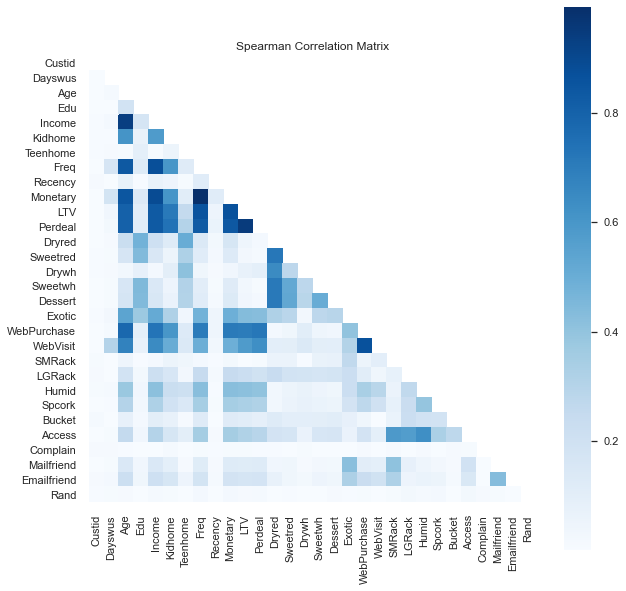

In [15]:
def heatmap_spearman(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Spearman Correlation Matrix')
    plt.show()
    
heatmap_spearman(df.corr(method='spearman').abs())

In [16]:
#fazer as outras correlacoes

As we can see there are some errors/outliers that are needed to be handled. Therefore they must be removed from the dataset.

The outliers quickly identified are in the SMRack, LGRack, Humid, Spcork, Bucket, Access, Complain, Mailfriend and Emailfriend, since the values in these columns are percentages and there are values above 100%.

The column Custid will be the new index of the dataframe.

The column Rand will be dropped since it only returns a random number between 0 and 1.

In [17]:
#fazer histogramas, remover erros, outliers(dbscan, lof)

In [18]:
df = df_original.copy()

In [19]:
df.shape

(10001, 30)

In [20]:
df.drop(["Rand"],axis=1,inplace=True)

In [21]:
df.set_index('Custid',inplace=True)

In [22]:
df.sort_index(inplace=True)

In [23]:
df.replace(" ", np.nan, inplace=True)

In [24]:
filters = (
    (df["SMRack"]>100) | (df["LGRack"]>100) | (df["Humid"]>100) | (df["Spcork"]>100) |
    (df["Bucket"]>100) | (df["Access"]>100) | (df["Complain"]>100) | (df["Mailfriend"]>100) | (df["Emailfriend"]>100)
          )
df1=df[filters]

In [25]:
to_remove = list(df1.index)

In [26]:
df = df.drop(to_remove)

In [27]:
df.shape

(10000, 28)

There aren't any more na values.

In [28]:
df.isna().sum().sum()

0

In [29]:
data_corr = df.corr()
corrdata = data_corr.abs().stack()
corrdata = corrdata.sort_values(ascending= False)
corrdata = corrdata[corrdata>0.9] 
corrdata = corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()

corrdata.columns = ["Features1","Features2","corr_value"]
corrdata.Features2.unique()

array(['Monetary', 'Freq', 'LTV', 'Age', 'Income'], dtype=object)

In [30]:
grouped_feature_list = []
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [31]:
for i in correlated_group_list:
    i.reset_index(drop=True,inplace=True)

In [32]:
correlated_group =[]
for i in range(len(correlated_group_list)):
    aux = correlated_group_list[i].Features1.unique()
    aux=np.append(aux,correlated_group_list[i].Features2.unique(),axis=0)
    correlated_group.append(aux)

In [33]:
for c in correlated_group:
    print(c)

['Freq' 'Monetary' 'LTV']
['Income' 'Age']


In [34]:
df.drop(["LTV", "Monetary"], inplace=True, axis=1)

In [35]:
df.drop(["Income"], inplace=True, axis=1)

In [36]:
df.shape

(10000, 25)

Separation of non-metric features and metric features.

In [37]:
non_metric_features = ["Kidhome","Teenhome", "SMRack", "LGRack", "Humid",
                       "Spcork", "Bucket", "Complain", "Mailfriend", "Emailfriend"]

In [38]:
metric_features = df.columns.drop(non_metric_features).to_list()

## Outliers

#### Isolation Forest

In [39]:
data_central = df.copy()

In [40]:
iso = IsolationForest(contamination=0.01)
iso_df = iso.fit_predict(data_central[metric_features])

In [41]:
mask_out =iso_df == -1
outliers_if=data_central[mask_out]
data_central.drop(outliers_if.index,inplace=True)

In [42]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / df_original.shape[0], 4), 5)*100, "%")

Percentage of data removed after outliers: 1.01 %


In [43]:
#reduzir a percentagem de outliers removed

#### Minimum Covariance Determinant


In [44]:
ee = EllipticEnvelope(contamination=0.01)
ee_df = ee.fit_predict(data_central[metric_features])

C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (46.359779206363598 > 19.816434387997962). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn("Determinant has increased; this should not happen: "
C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (46.349692322479491 > 20.422161832202526). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn("Determinant has increased; this should not happen: "
C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (46.368067996724406 > 20.37910

In [45]:
mask_out =ee_df == -1
outliers_mcd=data_central[mask_out]
data_central.drop(outliers_mcd.index,inplace=True)

In [46]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / df_original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 2.0 %


In [47]:
df.drop(outliers_if.index,inplace=True)
df.drop(outliers_mcd.index,inplace=True)

In [48]:
df.shape

(9801, 25)

## Data Visualization after some Feature Engeneering

Metric Features Histogram


Executing constrainedlayout
LayoutBox: gridspec000127.ss000128.ax000129, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000127.ss000130.ax000131, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.004312
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000127.ss000132.ax000133, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000127.ss000134.ax000135, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000127.ss000136.ax000137, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bot

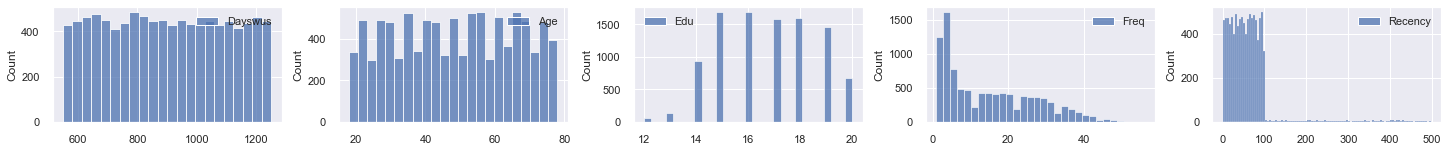

Executing constrainedlayout
LayoutBox: gridspec000138.ss000139.ax000140, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.006147
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000138.ss000141.ax000142, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.003630
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000138.ss000143.ax000144, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000138.ss000145.ax000146, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000138.ss000147.ax000148, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bot

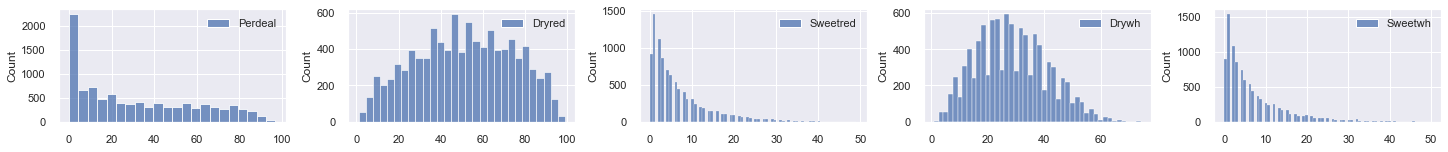

Executing constrainedlayout
LayoutBox: gridspec000149.ss000150.ax000151, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000149.ss000152.ax000153, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000149.ss000154.ax000155, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.033594
right 0.002083
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000149.ss000156.ax000157, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000149.ss000158.ax000159, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.002084
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bot

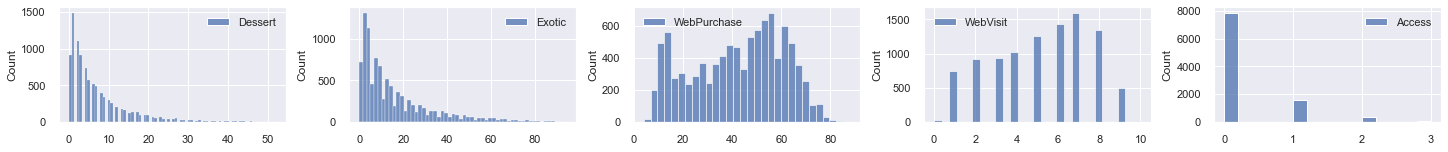

In [49]:
sns.set()

plot_features = df[metric_features]
#fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30,3), constrained_layout=True)
j=0
k=1
print("Metric Features Histogram")
for i in range(3):
    fig, axes = plt.subplots(1,5, figsize=(20,2), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.histplot(data=df[metric_features].iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

Executing constrainedlayout
LayoutBox: gridspec000160.ss000161.ax000162, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.028125
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000160.ss000163.ax000164, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000160.ss000165.ax000166, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000160.ss000167.ax000168, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000160.ss000169.ax000170, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bottoms


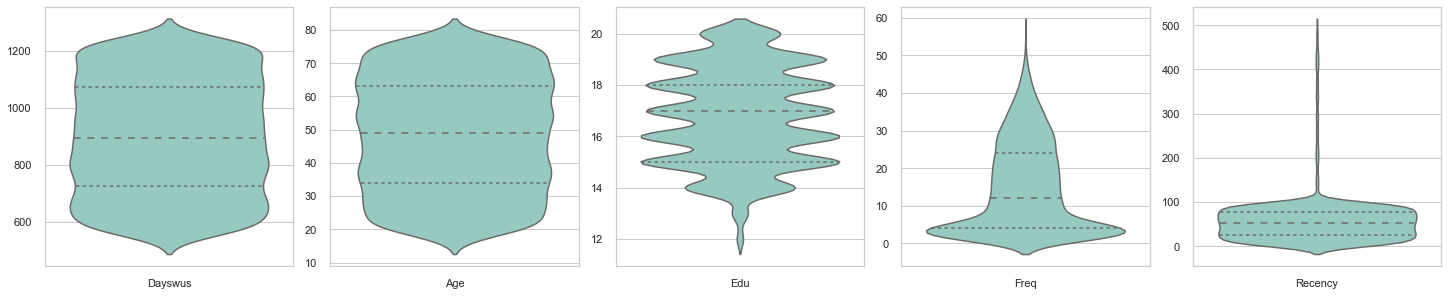

Executing constrainedlayout
LayoutBox: gridspec000171.ss000172.ax000173, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000171.ss000174.ax000175, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000171.ss000176.ax000177, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000171.ss000178.ax000179, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000171.ss000180.ax000181, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bottoms


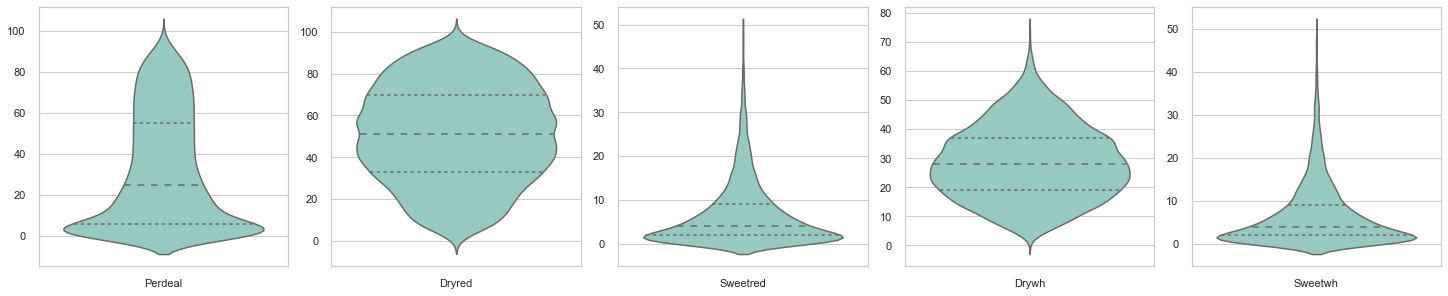

Executing constrainedlayout
LayoutBox: gridspec000182.ss000183.ax000184, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000182.ss000185.ax000186, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000182.ss000187.ax000188, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000182.ss000189.ax000190, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000182.ss000191.ax000192, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.021788
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bottoms


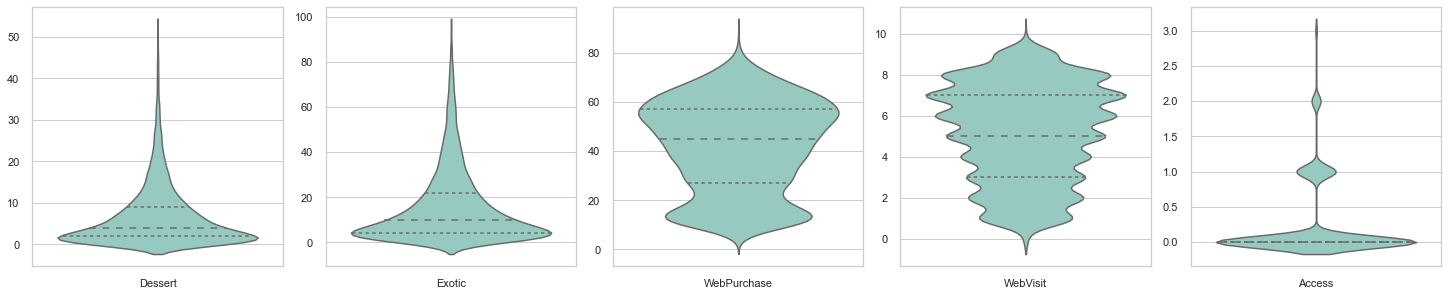

In [50]:
sns.set_theme(style="whitegrid")

j=0
k=1
for i in range(3):
    fig, axes = plt.subplots(1,5, figsize=(20,4), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.violinplot(data=df[metric_features].iloc[:,j:k], ax=i[0], palette="Set3", split=True,
                       scale="width", inner="quartile")
        j=j+1
        k=k+1

Non Metric Features Histogram


Executing constrainedlayout
LayoutBox: gridspec000193.ss000194.ax000195, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000193.ss000196.ax000197, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000193.ss000198.ax000199, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000193.ss000200.ax000201, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000193.ss000202.ax000203, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bot

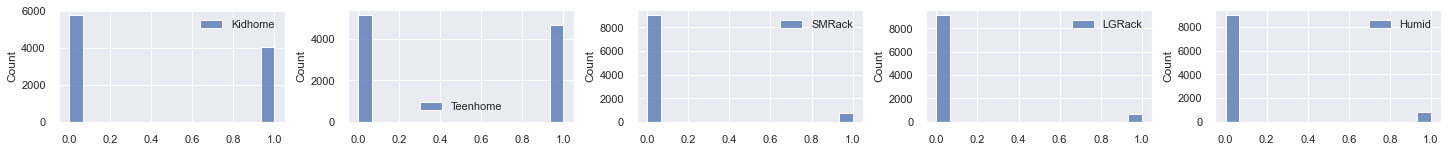

Executing constrainedlayout
LayoutBox: gridspec000204.ss000205.ax000206, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000204.ss000207.ax000208, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000204.ss000209.ax000210, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.042101
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000204.ss000211.ax000212, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
LayoutBox: gridspec000204.ss000213.ax000214, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.037847
right 0.003475
bottom 0.180557
bbox.y0 -0.034722
pos.y0 0.125000
same start rows; line up layoutbox tops
same stop rows; line up layoutbox bot

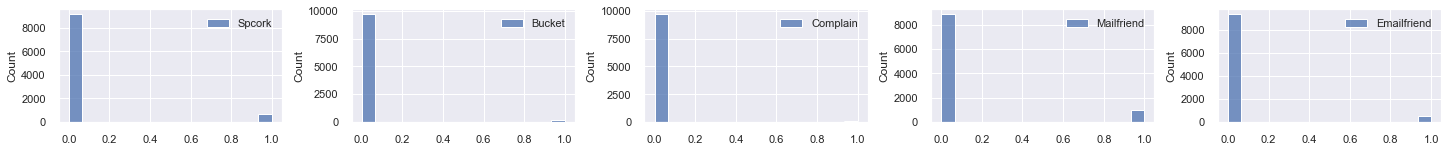

In [51]:
sns.set()

plot_features = df[non_metric_features]
#fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30,3), constrained_layout=True)
j=0
k=1
print("Non Metric Features Histogram")
for i in range(2):
    fig, axes = plt.subplots(1,5, figsize=(20,2), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.histplot(data=df[non_metric_features].iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

Executing constrainedlayout
LayoutBox: gridspec000215.ss000216.ax000217, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.028125
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000215.ss000218.ax000219, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000215.ss000220.ax000221, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000215.ss000222.ax000223, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000215.ss000224.ax000225, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.023872
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000215.ss000226.ax000227, (left: 0.000) (bot: 0.000) (right: 0.

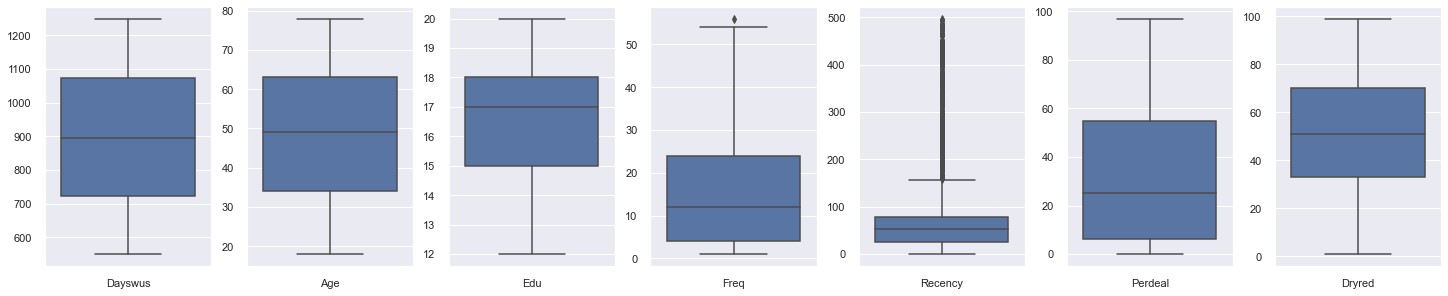

Executing constrainedlayout
LayoutBox: gridspec000230.ss000231.ax000232, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000230.ss000233.ax000234, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000230.ss000235.ax000236, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002084
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000230.ss000237.ax000238, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000230.ss000239.ax000240, (left: 0.000) (bot: 0.000) (right: 0.000) (top: 0.000)
left 0.019618
right 0.002083
bottom 0.090279
bbox.y0 0.045139
pos.y0 0.125000
LayoutBox: gridspec000230.ss000241.ax000242, (left: 0.000) (bot: 0.000) (right: 0.

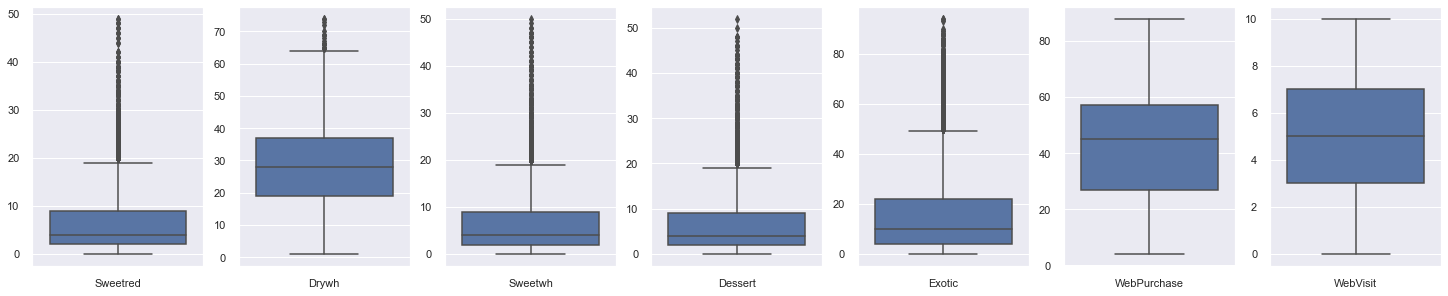

In [52]:
sns.set()

plot_features = df[metric_features].columns
#fig, axes = plt.subplots(1, len(plot_features), figsize=(45,8), constrained_layout=True)
j=0
k=1


for i in range(2):
    fig, axes = plt.subplots(1,int(len(plot_features)/2), figsize=(20,4), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.boxplot(data=df[metric_features].iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

In [53]:
# Pairwise Relationship of Numerical Variables
#sns.set()
#features = metric_features

# Setting pairplot
#sns.pairplot(data=df[metric_features], diag_kind="hist")

# Layout
#plt.subplots_adjust(top=0.95)
#plt.suptitle("Pairwise Relationship of Numerical Variables by Target", fontsize=20)

#plt.show()

<div class="alert alert-block alert-success">

## 3) Clustering
    
</div>

In [54]:
def plotKElbow(cluster,data,metric):
    visualizer = KElbowVisualizer(cluster, k=(2,12), metric=metric, timings=False,locate_elbowbool=False)
    visualizer.fit(data)        
    visualizer.show()   
    

In [55]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) #get cluster labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

In [56]:
def kmeans_cluster(df,n_clust):
    kmclust = KMeans(n_clusters=n_clust, init='k-means++', n_init=15, random_state=1)
    df_labels = kmclust.fit_predict(df)
    return df_labels


In [57]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        #ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [58]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [59]:
def gmm_cluster(data, nclust):
    gmm=GaussianMixture(n_components=nclust, init_params='kmeans', random_state=0)
    gmm.fit(data)
    clust_labels = gmm.predict(data)
    return(clust_labels)

In [60]:
def avg_silhouette(min_range,max_range,df,cluster):
    avg_silhouette = []
    for nclus in range(min_range,max_range):
        # Skip nclus == 1
        if nclus == 1:
            continue
    
        # Create a figure
        fig = plt.figure(figsize=(10,5 ))

        if "n_clusters" in cluster.get_params():
            param = "n_clusters"
        else:
            param = "n_components"
        
        
        # Get the cluster labels by applying a given clustering algorithm
        clustering = cluster.set_params(**{param:nclus})
        cluster_labels = clustering.fit_predict(df)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(df, cluster_labels)
        avg_silhouette.append(silhouette_avg)
        print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        y_lower = 10
        for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
            color = cm.nipy_spectral(float(i) / nclus)
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title("The silhouette plot for the various clusters.")
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label") 

    # The vertical line for average silhouette score of all the values
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
        xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
        plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
        plt.ylim([0, len(df) + (nclus + 1) * 10])

        plt.yticks([])  # Clear the yaxis labels / ticks
        plt.xticks(np.arange(xmin, xmax, 0.1))

<div class="alert alert-block alert-info">

### Standardaization
    
</div>

In [61]:
scaler = StandardScaler().fit(df)
standard_df=pd.DataFrame(scaler.transform(df),index=df.index, columns=df.columns)

<div class="alert alert-block alert-info">

### Select the best features
    
</div>

In [62]:
cluster = KMeans(random_state=0)

findfont: Matching STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmb10' (

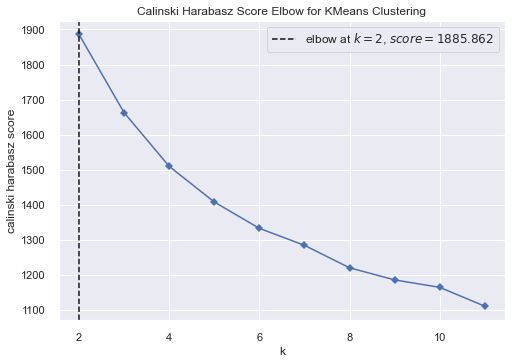

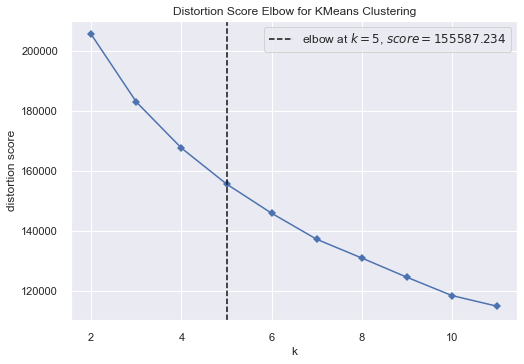

In [63]:
plotKElbow(cluster,standard_df,'calinski_harabasz')
plotKElbow(cluster,standard_df,'distortion')

In [64]:
standard_df['labels']=kmeans_cluster(standard_df,4)

In [65]:
# Preparing the data
X = standard_df.drop(columns='labels')
y = standard_df.labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(rf.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 96.43% of the customers correctly


In [66]:
importances = rf.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

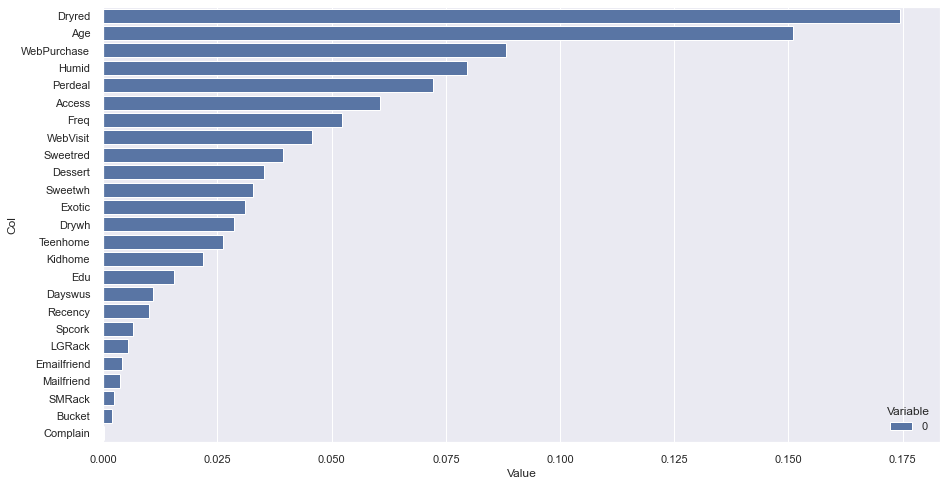

In [67]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [68]:
selected_df=standard_df.loc[:,["Age","Dryred","Perdeal","Humid","Sweetred","WebPurchase","Teenhome"]]

<div class="alert alert-block alert-info">

### Self-Organizing Maps (SOM) + K-means
    
</div>

Considering the good results of the previous segmentation we decided to experiment with the SOM + K-means approach.

In [69]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

sm = sompy.SOMFactory().build(
    selected_df.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=selected_df.columns
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.044000, quantization error: 1.826845

 epoch: 2 ---> elapsed time:  0.035000, quantization error: 2.448926

 epoch: 3 ---> elapsed time:  0.035000, quantization error: 2.374274

 epoch: 4 ---> elapsed time:  0.033000, quantization error: 2.327157

 epoch: 5 ---> elapsed time:  0.035000, quantization error: 2.307938

 epoch: 6 ---> elapsed time:  0.033000, quantization error: 2.295543

 epoch: 7 ---> elapsed time:  0.032000, quantization error: 2.284216

 epoch: 8 ---> elapsed time:  0.031000, quantization error: 2.272205

 epoch: 9 ---> elapsed time:  0.032000, quantization error: 2.264569

 epoch: 10 ---> elapsed time:  0.031000, quantization error: 2.258535

 epoch: 11 ---> elapsed time:  0.032000, quantization error: 2.254209

 epoch: 12 ---> elapsed time:  0.031000, quantization error: 2.249843

 epoch: 13 ---> 

C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sompy\visualization\plot_tools.py:45: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(shape[0], shape[1], comp + 1, aspect='equal')


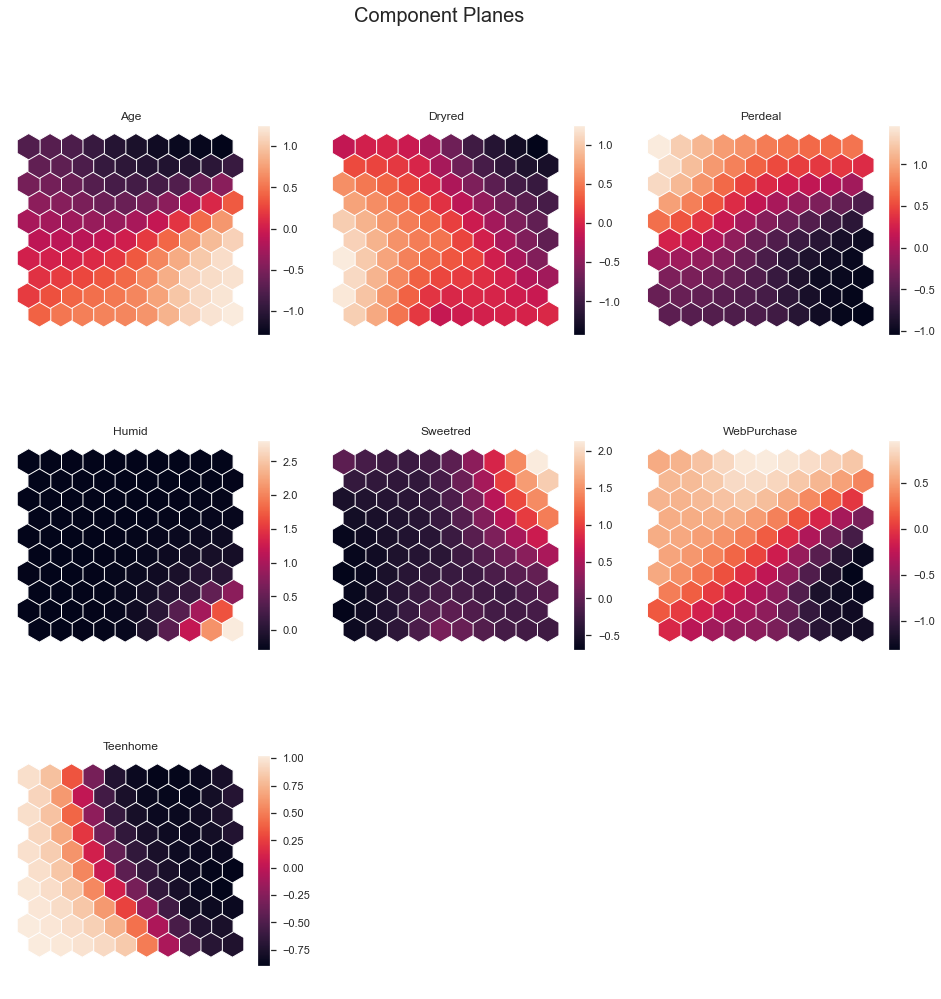

In [70]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

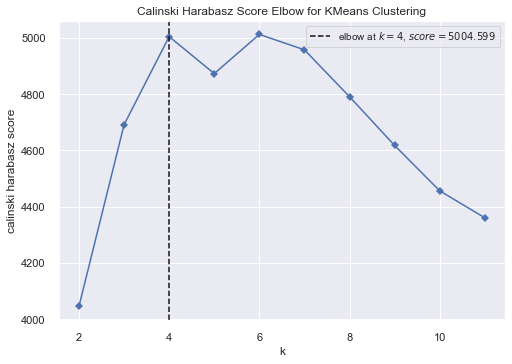

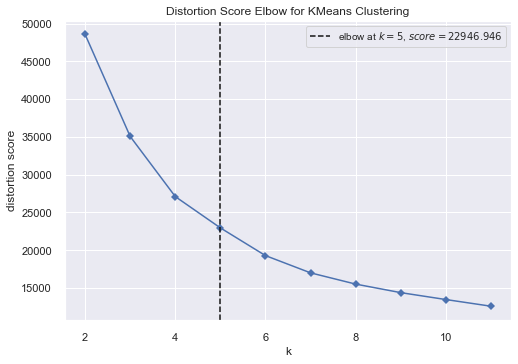

In [71]:
plotKElbow(cluster,selected_df,'calinski_harabasz')
plotKElbow(cluster,selected_df,'distortion')

In [72]:

selected_df.reset_index(inplace=True)
selected_df.drop("Custid",axis=1,inplace=True)

In [73]:
selected_df

,Age,Dryred,Perdeal,Humid,Sweetred,WebPurchase,Teenhome
0,1.147114,-0.608291,-1.042024,-0.300756,-0.245490,-1.246973,-0.952265
1,1.732135,0.171955,-1.114143,-0.300756,-0.783395,-1.787147,-0.952265
2,-1.426976,-0.825026,1.229716,-0.300756,1.637176,0.913720,-0.952265
3,0.620596,0.388690,-0.717490,-0.300756,0.426891,-0.382696,1.050127
4,0.620596,0.345343,-0.969906,-0.300756,-0.245490,-0.436713,1.050127
...,...,...,...,...,...,...,...
9796,-1.192968,-0.434903,-0.897787,-0.300756,0.561367,-0.598765,-0.952265
9797,1.615131,0.432037,-1.042024,3.324959,-0.648918,0.157478,1.050127
9798,1.205616,-0.218168,-1.078084,-0.300756,-0.917871,-1.300991,-0.952265
9799,0.971608,-0.131474,-1.005965,-0.300756,1.233748,-0.328679,-0.952265


In [74]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = sm.cluster(kmeans)
hits  = HitMapView(12, 12,"Clustering", text_size=10)
#hits.show(sm, anotate=True, onlyzeros=Falsace, labelsize=7, cmap="Pastel1")

plt.show()

In [75]:
nodes = sm.get_node_vectors()

kmeans_nodes = pd.DataFrame(nodes, columns=selected_df.columns)
kmeans_nodes['kmeans_som_label']= nodeclus_labels

In [76]:
# Obtaining SOM's BMUs labels
bmus_map_kmeans = sm.find_bmu(selected_df)[0]  # get bmus for each observation in df

kmeans_bmus = pd.DataFrame(
    np.concatenate((selected_df, np.expand_dims(bmus_map_kmeans,1)), axis=1),
    index=selected_df.index, columns=np.append(selected_df.columns,"BMU")
)

In [77]:
# Get cluster labels for each observation
som_kmeans_final = kmeans_bmus.merge(kmeans_nodes['kmeans_som_label'], 'left', left_on="BMU", right_index=True)

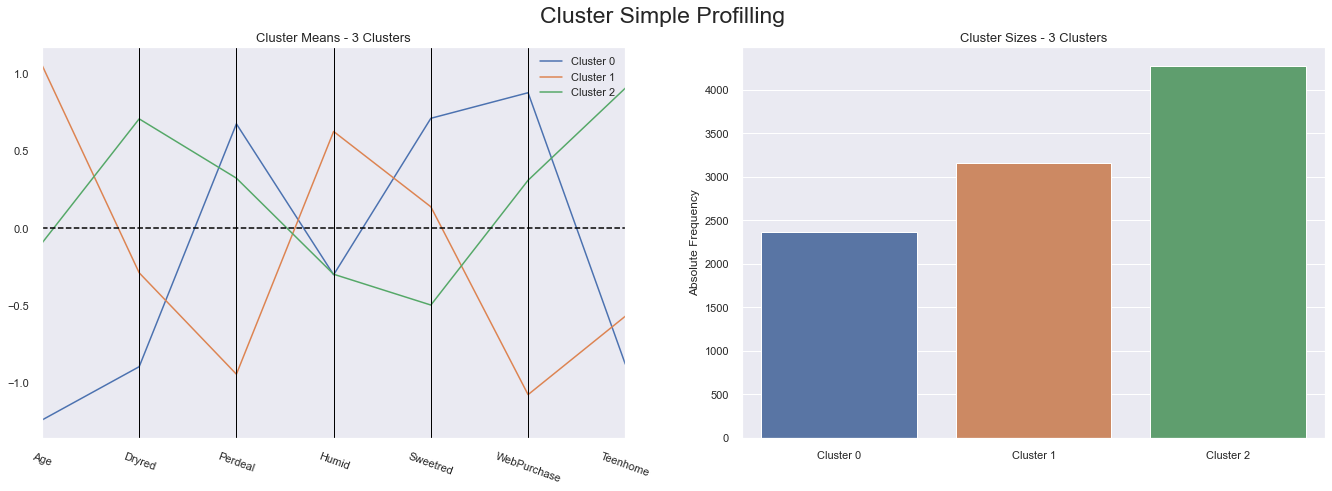

In [78]:
cluster_profiles(som_kmeans_final.drop('BMU',axis=1),["kmeans_som_label"], figsize=(23, 7),compar_titles=["K-Means + HC - Value"])

<div class="alert alert-block alert-info">

### K-means
    
</div>


In [79]:
kmeans=selected_df.copy()

In [80]:
kmeans['label']=kmeans_cluster(kmeans,3)

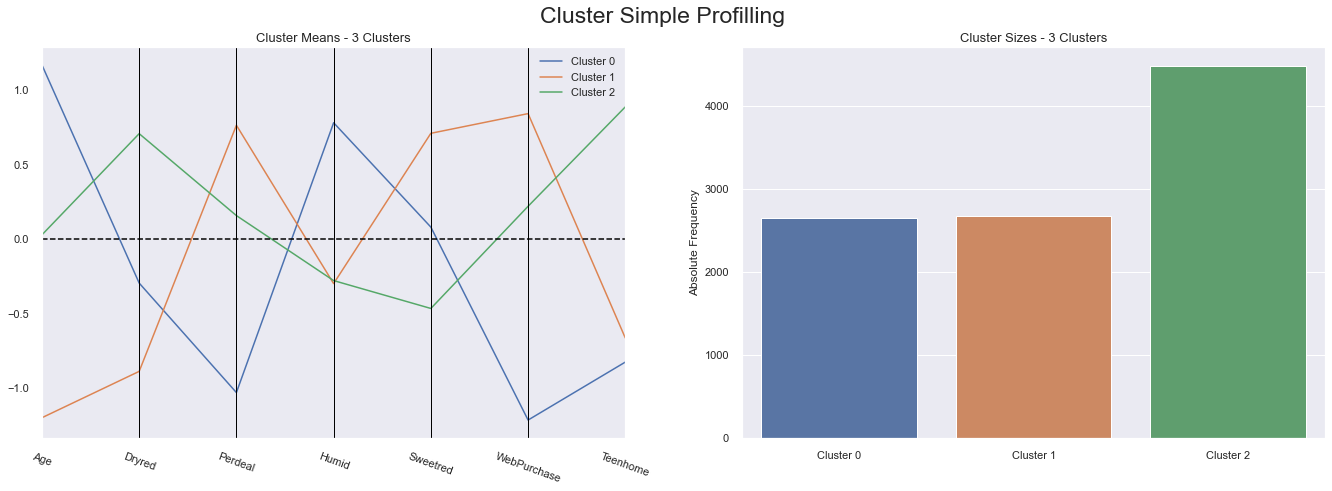

In [81]:
cluster_profiles(kmeans, ["label"], figsize=(23, 7), compar_titles=["K-Means - All Data"])

<div class="alert alert-block alert-info">

### Self-Organizing Maps (SOM) + HC
    
</div>

In [82]:
# Obtaining SOM's BMUs labels
bmus_map_hc = sm.find_bmu(selected_df)[0]  # get bmus for each observation in df

df_bmus_hc = pd.DataFrame(
    np.concatenate((selected_df, np.expand_dims(bmus_map_hc,1)), axis=1),
    index=selected_df.index, columns=np.append(selected_df.columns,"BMU")
)

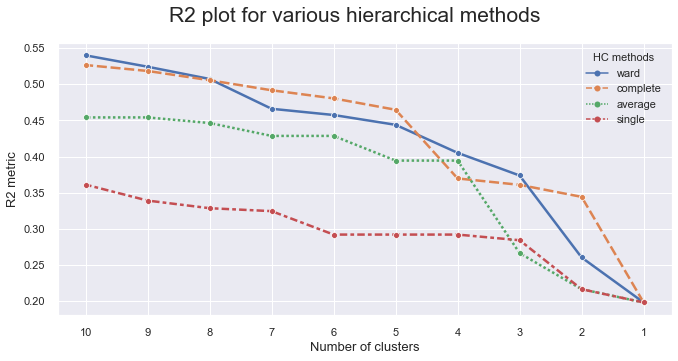

In [83]:
df_bmus_hc = df_bmus_hc.groupby("BMU").mean()
# Prepare input

hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(df=df_bmus_hc, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [84]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclabel=hclust.fit_predict(df_bmus_hc)

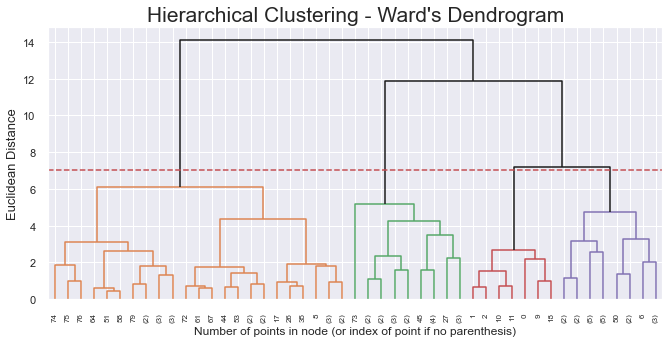

In [85]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 7
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [86]:
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_labels = sm.cluster(hierclust)


In [87]:
# Check the nodes and and respective clusters
nodes = sm.get_node_vectors()

hc_nodes = pd.DataFrame(nodes, columns=selected_df.columns)
hc_nodes['hc_som_label'] = hc_labels

In [88]:
# Get cluster labels for each observation
som_hc_final = df_bmus_hc.merge(hc_nodes['hc_som_label'], 'left', left_on="BMU", right_index=True)

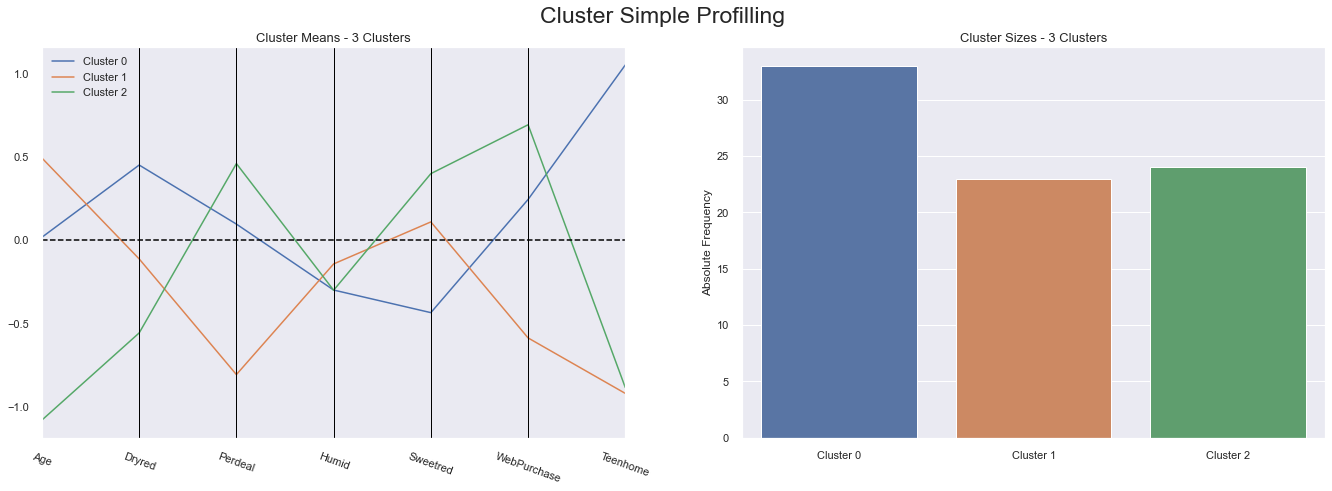

In [89]:
cluster_profiles(som_hc_final,["hc_som_label"], figsize=(23, 7),compar_titles=["SOM + HC - Value"])

<div class="alert alert-block alert-info">

### MiniBatchKMeans
    
</div>

In [90]:
MiniBatch = MiniBatchKMeans(n_clusters=None,random_state=0)

C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warn

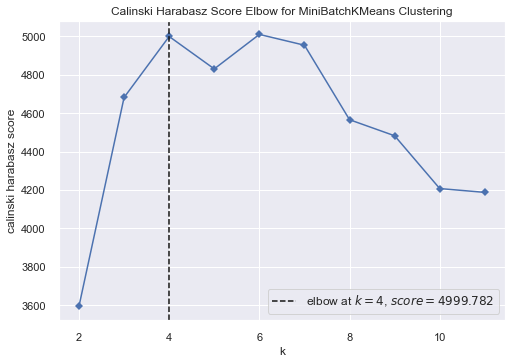

C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warn

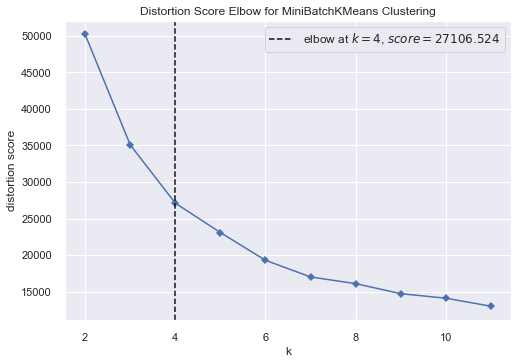

In [91]:
plotKElbow(MiniBatch,selected_df,'calinski_harabasz')
plotKElbow(MiniBatch,selected_df,'distortion')

In [92]:
miniBatch = MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
miniBatch_labels = miniBatch.fit_predict(selected_df)

C:\Users\migue\.conda\envs\BCDS\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [93]:
miniBatch_df=selected_df.copy()
miniBatch_df['miniBatch_labels']=miniBatch_labels

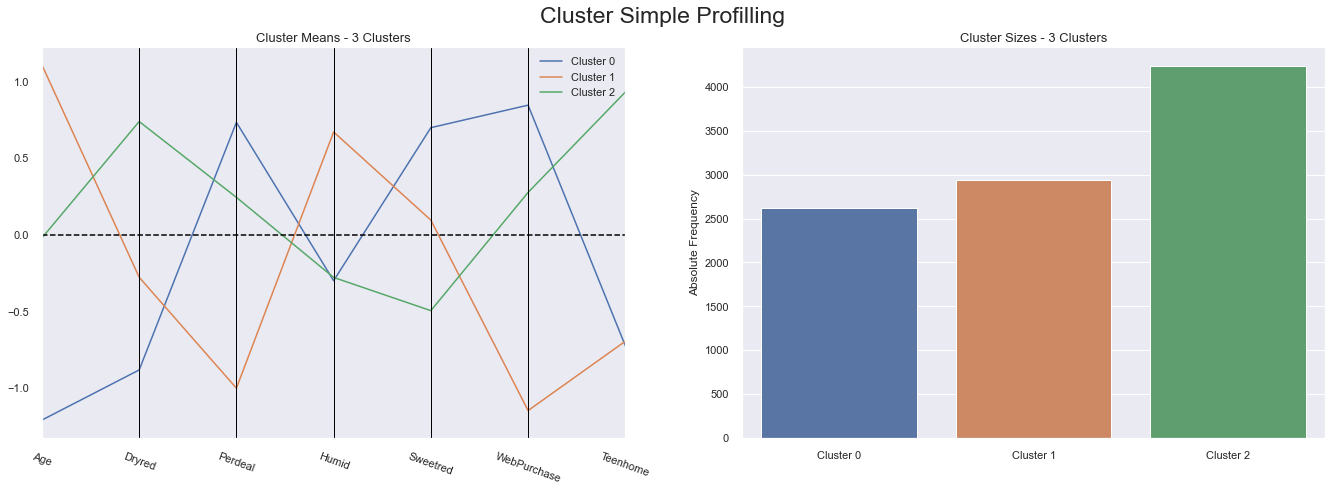

In [94]:
cluster_profiles(miniBatch_df,["miniBatch_labels"], figsize=(23, 7),compar_titles=["MiniBatchKMeans Clustering"])

<div class="alert alert-block alert-info">

### GMM
    
</div>

In [95]:
gmm_df = selected_df.copy()

In [96]:
gmm = GaussianMixture(init_params='kmeans', random_state=0)

For n_clusters = 2, the average silhouette_score is : 0.38734358533360536
For n_clusters = 3, the average silhouette_score is : 0.2834886264805928
For n_clusters = 4, the average silhouette_score is : 0.3574804806671828
For n_clusters = 5, the average silhouette_score is : 0.2991808194964038


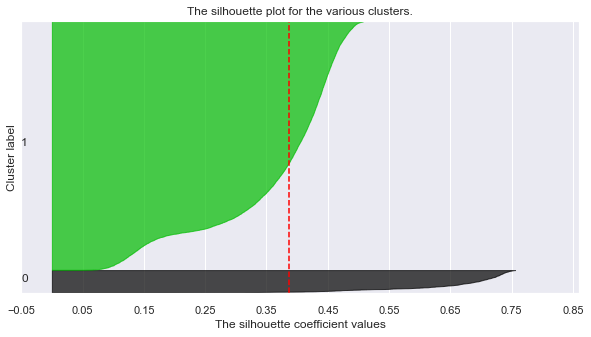

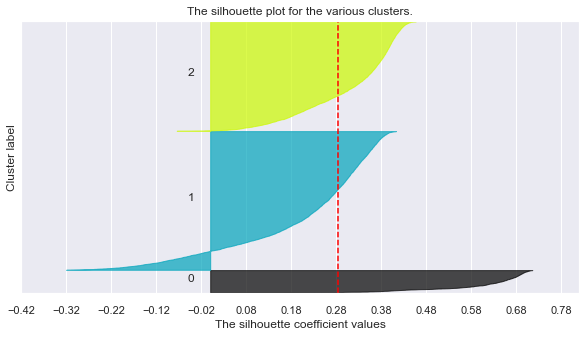

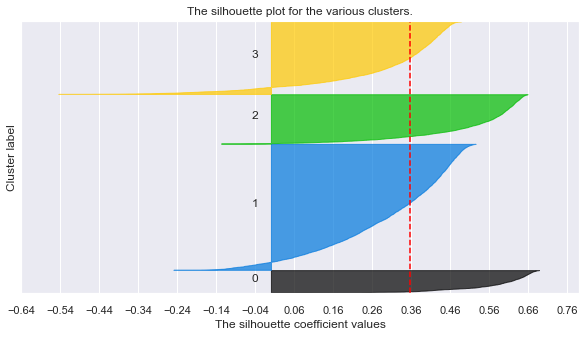

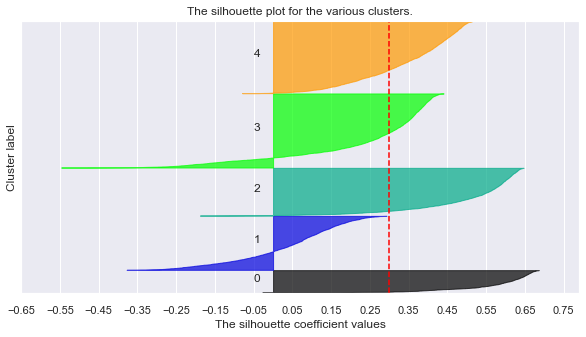

In [97]:
avg_silhouette(2,6,gmm_df,gmm)

In [98]:
gmm_df['label']=gmm_cluster(gmm_df, 3)

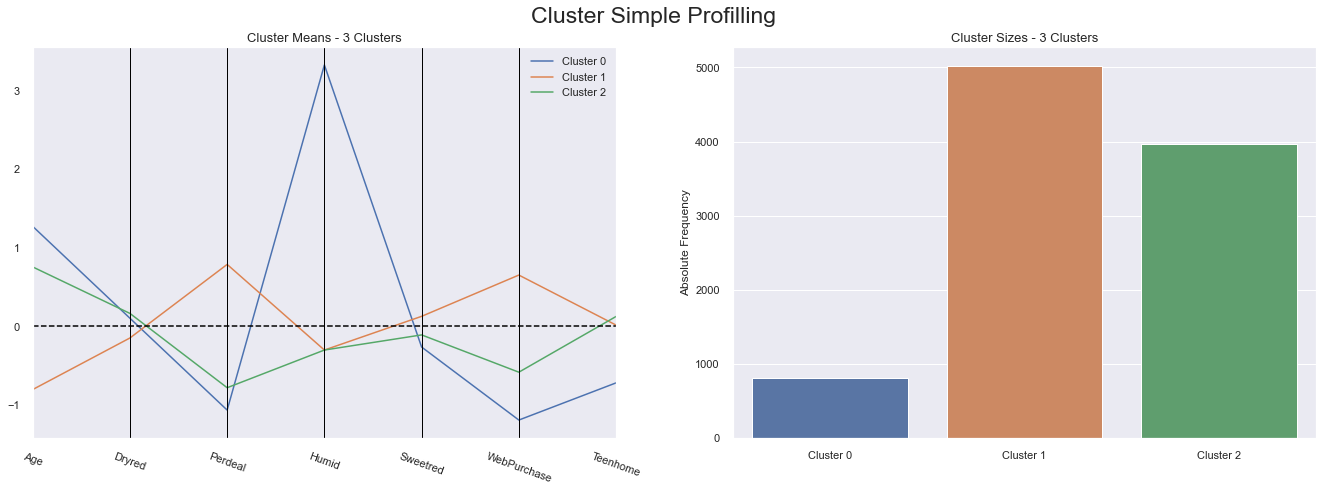

In [99]:
cluster_profiles(gmm_df, ["label"], figsize=(23, 7), compar_titles=[ "GMM - All Data"])

<div class="alert alert-block alert-info">

### HC
    
</div>

In [100]:
hc_df = selected_df.copy()

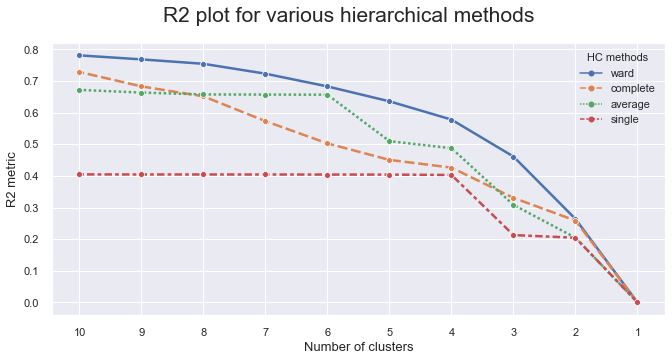

In [101]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(hc_df, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

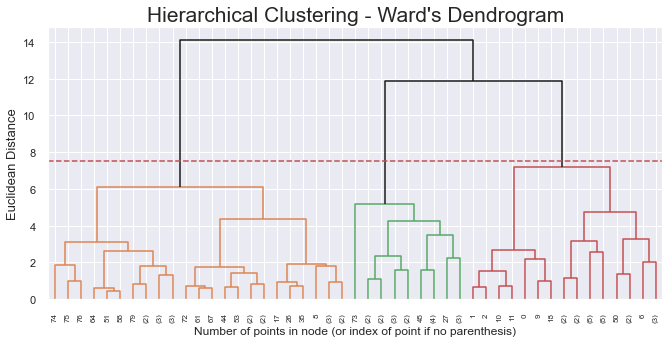

In [102]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 7.5
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [103]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=3)
hc_df['label']=hclust.fit_predict(hc_df)

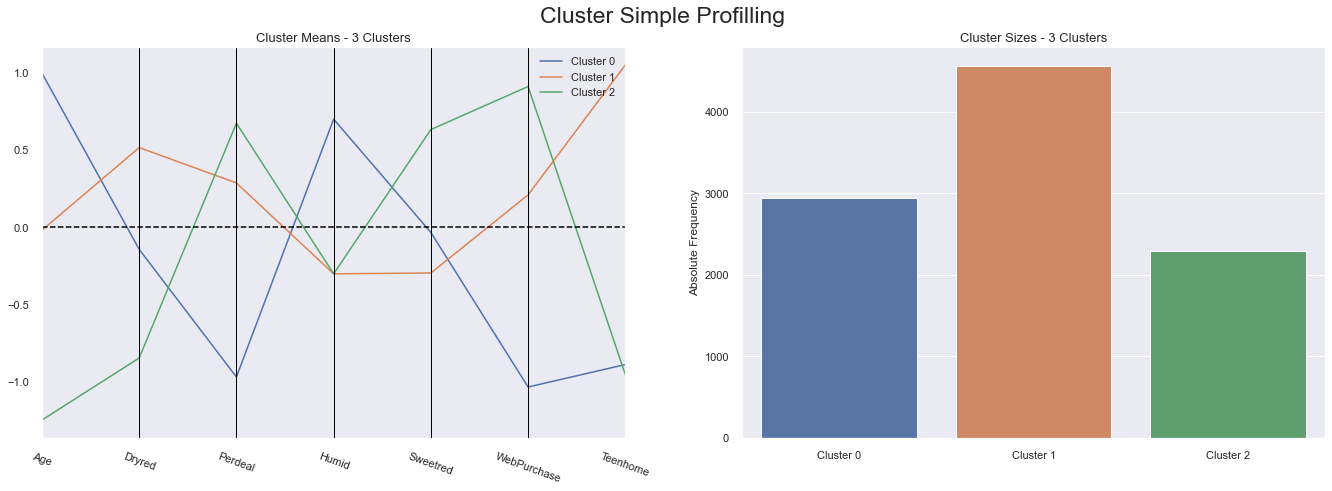

In [104]:
cluster_profiles(hc_df, ["label"], figsize=(23, 7), compar_titles=[ "HC - All Data"])

<div class="alert alert-block alert-success">

## 4) Decision Tree
    
</div>

In [105]:
som_kmeans_final

,Age,Dryred,Perdeal,Humid,Sweetred,WebPurchase,Teenhome,BMU,kmeans_som_label
0,1.147114,-0.608291,-1.042024,-0.300756,-0.245490,-1.246973,-0.952265,60.0,1
1,1.732135,0.171955,-1.114143,-0.300756,-0.783395,-1.787147,-0.952265,72.0,1
2,-1.426976,-0.825026,1.229716,-0.300756,1.637176,0.913720,-0.952265,1.0,0
3,0.620596,0.388690,-0.717490,-0.300756,0.426891,-0.382696,1.050127,95.0,1
4,0.620596,0.345343,-0.969906,-0.300756,-0.245490,-0.436713,1.050127,97.0,2
...,...,...,...,...,...,...,...,...,...
9796,-1.192968,-0.434903,-0.897787,-0.300756,0.561367,-0.598765,-0.952265,32.0,0
9797,1.615131,0.432037,-1.042024,3.324959,-0.648918,0.157478,1.050127,90.0,1
9798,1.205616,-0.218168,-1.078084,-0.300756,-0.917871,-1.300991,-0.952265,72.0,1
9799,0.971608,-0.131474,-1.005965,-0.300756,1.233748,-0.328679,-0.952265,40.0,1


In [106]:
# Preparing the data
X = som_kmeans_final.drop(columns=['BMU','kmeans_som_label'])
y = som_kmeans_final.kmeans_som_label

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 94.59% of the customers correctly


In [107]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

Age            0.457951
Dryred         0.033000
Perdeal        0.000000
Humid          0.027664
Sweetred       0.056597
WebPurchase    0.000000
Teenhome       0.424787
dtype: float64

In [108]:
#pd.Series(outliers_mcd.index.tolist() + outliers_if.index.tolist()).describe()
#pd.Series(pd.Series(outliers_mcd.index.tolist() + outliers_if.index.tolist()).unique()).describe()

#There aren't duplicate values 

In [109]:
df_out = pd.concat([outliers_mcd,outliers_if])

In [110]:
df_out

,Dayswus,Age,Edu,Kidhome,Teenhome,Freq,Recency,Perdeal,Dryred,Sweetred,...,WebVisit,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend
Custid,,,,,,,,,,,,,,,,,,,,,
1010.0,1109.0,20.0,14.0,1.0,0.0,1.0,153.0,55.0,18.0,55.0,...,7.0,0,0,0,0,0,0,0,0,0
1422.0,669.0,25.0,18.0,0.0,1.0,1.0,538.0,54.0,26.0,20.0,...,6.0,0,0,0,0,0,0,0,0,0
1452.0,857.0,20.0,14.0,1.0,0.0,3.0,16.0,72.0,2.0,19.0,...,7.0,0,0,0,0,0,0,0,0,0
1647.0,601.0,23.0,17.0,1.0,0.0,1.0,503.0,29.0,20.0,5.0,...,7.0,0,0,0,0,0,0,0,0,0
1667.0,1210.0,18.0,12.0,0.0,0.0,3.0,29.0,33.0,5.0,5.0,...,8.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568.0,1129.0,19.0,13.0,1.0,0.0,1.0,546.0,79.0,6.0,5.0,...,8.0,0,0,0,0,0,0,0,0,0
10609.0,577.0,18.0,12.0,1.0,0.0,4.0,61.0,59.0,4.0,37.0,...,3.0,0,0,0,0,0,0,0,0,0
10680.0,1154.0,18.0,12.0,0.0,0.0,5.0,99.0,45.0,4.0,38.0,...,4.0,0,0,0,0,0,0,0,0,0


In [111]:
# Predicting the cluster labels of the outliers
out_norm = pd.DataFrame(scaler.transform(df_out[df.columns]),index=df_out.index, columns=df.columns)
out_norm['kmeans_som_label'] = dt.predict(out_norm[X.columns])
out_norm.head()

,Dayswus,Age,Edu,Kidhome,Teenhome,Freq,Recency,Perdeal,Dryred,Sweetred,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,kmeans_som_label
Custid,,,,,,,,,,,,,,,,,,,,,
1010.0,1.041967,-1.660985,-1.510175,1.193646,-0.952265,-1.160125,1.695191,0.833063,-1.431885,6.478318,...,-0.294868,-0.276267,-0.300756,-0.272829,-0.115488,-0.456877,-0.107029,-0.328189,-0.223175,0
1422.0,-1.134262,-1.368474,0.657947,-0.837770,1.050127,-1.160125,8.579113,0.797004,-1.085109,1.771652,...,-0.294868,-0.276267,-0.300756,-0.272829,-0.115488,-0.456877,-0.107029,-0.328189,-0.223175,2
1452.0,-0.204419,-1.660985,-1.510175,1.193646,-0.952265,-0.992659,-0.754412,1.446073,-2.125437,1.637176,...,-0.294868,-0.276267,-0.300756,-0.272829,-0.115488,-0.456877,-0.107029,-0.328189,-0.223175,0
1647.0,-1.470588,-1.485478,0.115916,1.193646,-0.952265,-1.160125,7.953302,-0.104481,-1.345191,-0.245490,...,-0.294868,-0.276267,-0.300756,-0.272829,-0.115488,-0.456877,-0.107029,-0.328189,-0.223175,0
1667.0,1.541511,-1.777989,-2.594236,-0.837770,-0.952265,-0.992659,-0.521968,0.039757,-1.995396,-0.245490,...,-0.294868,-0.276267,-0.300756,-0.272829,-0.115488,-0.456877,-0.107029,-0.328189,-0.223175,0


In [112]:
# Predicting the cluster labels of the outliers
df_out['kmeans_som_label'] = dt.predict(out_norm[X.columns])
df_out

,Dayswus,Age,Edu,Kidhome,Teenhome,Freq,Recency,Perdeal,Dryred,Sweetred,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,kmeans_som_label
Custid,,,,,,,,,,,,,,,,,,,,,
1010.0,1109.0,20.0,14.0,1.0,0.0,1.0,153.0,55.0,18.0,55.0,...,0,0,0,0,0,0,0,0,0,0
1422.0,669.0,25.0,18.0,0.0,1.0,1.0,538.0,54.0,26.0,20.0,...,0,0,0,0,0,0,0,0,0,2
1452.0,857.0,20.0,14.0,1.0,0.0,3.0,16.0,72.0,2.0,19.0,...,0,0,0,0,0,0,0,0,0,0
1647.0,601.0,23.0,17.0,1.0,0.0,1.0,503.0,29.0,20.0,5.0,...,0,0,0,0,0,0,0,0,0,0
1667.0,1210.0,18.0,12.0,0.0,0.0,3.0,29.0,33.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568.0,1129.0,19.0,13.0,1.0,0.0,1.0,546.0,79.0,6.0,5.0,...,0,0,0,0,0,0,0,0,0,0
10609.0,577.0,18.0,12.0,1.0,0.0,4.0,61.0,59.0,4.0,37.0,...,0,0,0,0,0,0,0,0,0,0
10680.0,1154.0,18.0,12.0,0.0,0.0,5.0,99.0,45.0,4.0,38.0,...,0,0,0,0,0,0,0,0,0,0


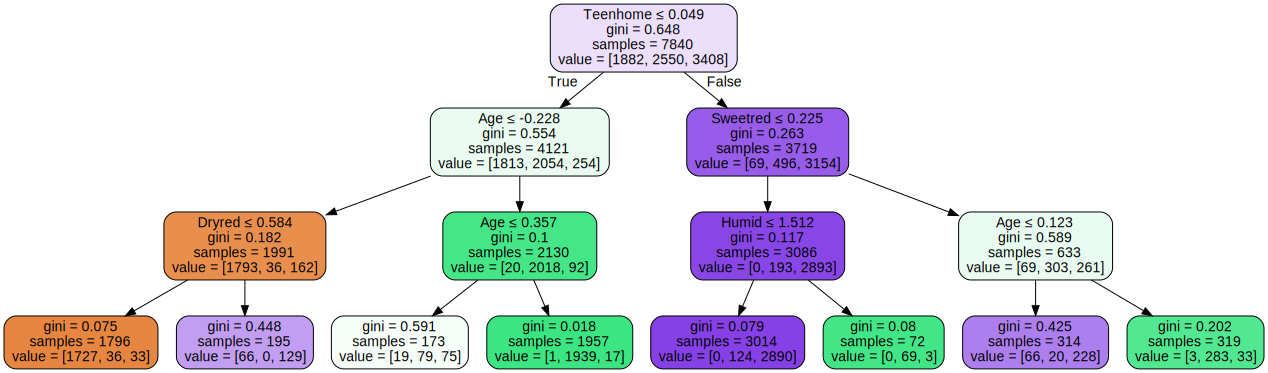

In [113]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)  
graphviz.Source(dot_data)